# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
units = "metric"
params = {
    "q":city
    ,"appid":weather_api_key
    ,"units":units
    ,}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params["q"]= city
    city_url = requests.get(url,params=params).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp = city_url["main"]["temp_max"]
        city_humidity = city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | madang
Processing Record 9 of Set 1 | desaguadero
Processing Record 10 of Set 1 | polyarnyy
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | maun
Processing Record 13 of Set 1 | alo
Processing Record 14 of Set 1 | khanabad
Processing Record 15 of Set 1 | kupang
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | shanwei
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | kilindoni
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | juan de

Processing Record 40 of Set 4 | taroa
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | fernie
Processing Record 43 of Set 4 | tranas
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | guangshui
Processing Record 46 of Set 4 | micheweni
Processing Record 47 of Set 4 | lindi
Processing Record 48 of Set 4 | west island
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | xai-xai
Processing Record 1 of Set 5 | virginia
Processing Record 2 of Set 5 | hulan
Processing Record 3 of Set 5 | al-`ula
City not found. Skipping...
Processing Record 4 of Set 5 | mossel bay
Processing Record 5 of Set 5 | susuman
Processing Record 6 of Set 5 | solnechnyy
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | batesville
Processing Record 9 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 5 | codrington
Processing Record 11 of Set 5 | krasnoturansk
Processing Record 12 of Set 5 | mana
Processing Record 

Processing Record 29 of Set 8 | port isabel
Processing Record 30 of Set 8 | sakaiminato
Processing Record 31 of Set 8 | hadibu
Processing Record 32 of Set 8 | taoudenni
Processing Record 33 of Set 8 | san-pedro
Processing Record 34 of Set 8 | nagqu
Processing Record 35 of Set 8 | isafjordur
Processing Record 36 of Set 8 | hotan
Processing Record 37 of Set 8 | bargara
City not found. Skipping...
Processing Record 38 of Set 8 | farah
Processing Record 39 of Set 8 | ponta delgada
Processing Record 40 of Set 8 | long beach
Processing Record 41 of Set 8 | kolondieba
Processing Record 42 of Set 8 | dalandzadgad
Processing Record 43 of Set 8 | sao vicente
Processing Record 44 of Set 8 | chifeng
Processing Record 45 of Set 8 | arteche
Processing Record 46 of Set 8 | myeik
Processing Record 47 of Set 8 | perugorria
Processing Record 48 of Set 8 | ilebo
Processing Record 49 of Set 8 | nova sintra
Processing Record 0 of Set 9 | kill devil hills
Processing Record 1 of Set 9 | la sarre
Processing R

Processing Record 21 of Set 12 | kuala terengganu
Processing Record 22 of Set 12 | thunder bay
Processing Record 23 of Set 12 | raduzhny
Processing Record 24 of Set 12 | bamboo flat
Processing Record 25 of Set 12 | namtsy
Processing Record 26 of Set 12 | del rio
Processing Record 27 of Set 12 | port saint john's
Processing Record 28 of Set 12 | mailsi
Processing Record 29 of Set 12 | zhumadian
Processing Record 30 of Set 12 | sangkhla buri
Processing Record 31 of Set 12 | tyre
Processing Record 32 of Set 12 | arrah
Processing Record 33 of Set 12 | mengcheng chengguanzhen
Processing Record 34 of Set 12 | canico
Processing Record 35 of Set 12 | defuniak springs
Processing Record 36 of Set 12 | riyadh
Processing Record 37 of Set 12 | turbat
Processing Record 38 of Set 12 | quezon
Processing Record 39 of Set 12 | manta
Processing Record 40 of Set 12 | lata
Processing Record 41 of Set 12 | el dorado
Processing Record 42 of Set 12 | dauphin
Processing Record 43 of Set 12 | kilju
------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-5.72,85,75,7.00,RU,1682285544
1,port-aux-francais,-49.3500,70.2167,4.13,64,55,14.32,TF,1682285545
2,aykhal,66.0000,111.5000,-9.81,98,100,0.56,RU,1682285547
3,waitangi,-43.9535,-176.5597,14.34,92,100,3.13,NZ,1682285321
4,ust-nera,64.5667,143.2000,-6.58,91,100,3.28,RU,1682285549


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-5.72,85,75,7.00,RU,1682285544
1,port-aux-francais,-49.3500,70.2167,4.13,64,55,14.32,TF,1682285545
2,aykhal,66.0000,111.5000,-9.81,98,100,0.56,RU,1682285547
3,waitangi,-43.9535,-176.5597,14.34,92,100,3.13,NZ,1682285321
4,ust-nera,64.5667,143.2000,-6.58,91,100,3.28,RU,1682285549


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

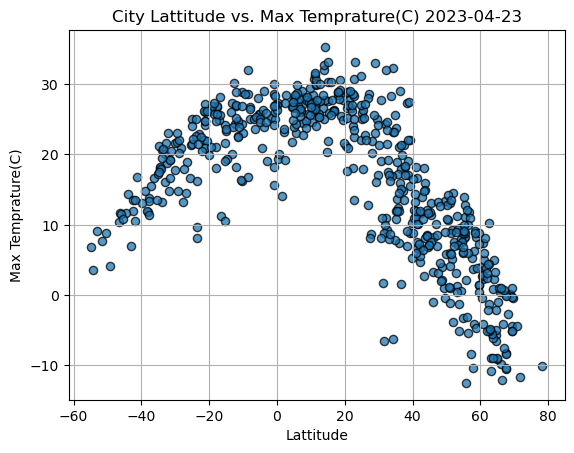

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=35, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Max Temprature(C)")
plt.title("City Lattitude vs. Max Temprature(C) 2023-04-23")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

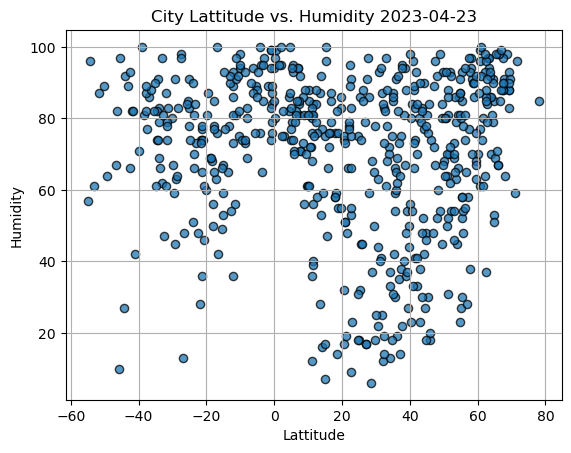

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=35, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Lattitude vs. Humidity 2023-04-23")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

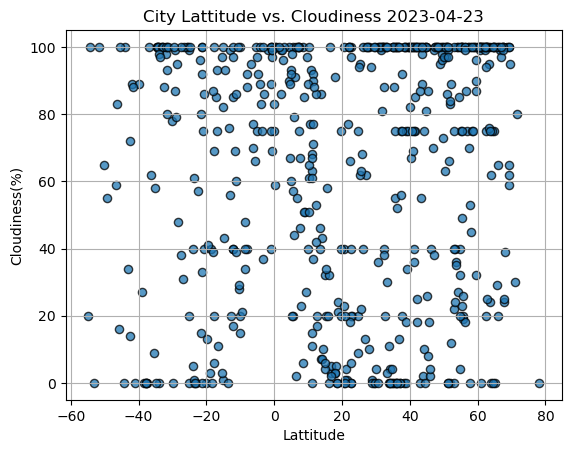

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=35, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Lattitude vs. Cloudiness 2023-04-23")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

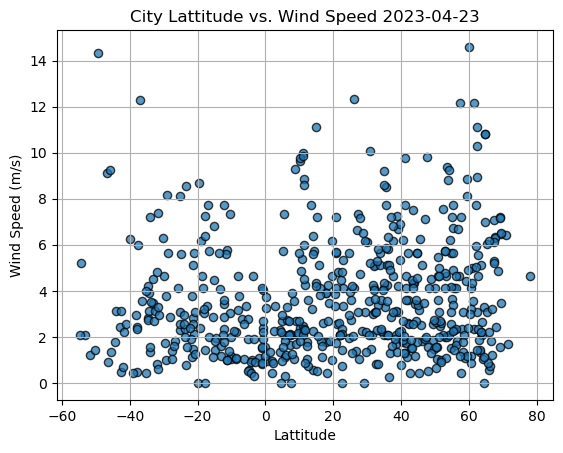

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=35, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Lattitude vs. Wind Speed 2023-04-23")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regress_scatter(x_values,y_values,xlab,ylab,title,fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-5.72,85,75,7.00,RU,1682285544
2,aykhal,66.0000,111.5000,-9.81,98,100,0.56,RU,1682285547
4,ust-nera,64.5667,143.2000,-6.58,91,100,3.28,RU,1682285549
8,polyarnyy,69.1989,33.4478,-4.38,88,65,7.22,RU,1682285552
11,alo,7.4178,6.7371,27.02,81,100,1.66,NG,1682285554


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.13,64,55,14.32,TF,1682285545
3,waitangi,-43.9535,-176.5597,14.34,92,100,3.13,NZ,1682285321
5,puerto natales,-51.7236,-72.4875,7.70,87,100,1.21,CL,1682285548
6,madang,-5.2246,145.7966,25.75,89,100,1.89,PG,1682285550
7,desaguadero,-16.5656,-69.0417,11.23,42,11,2.00,PE,1682285551


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7524951175058764


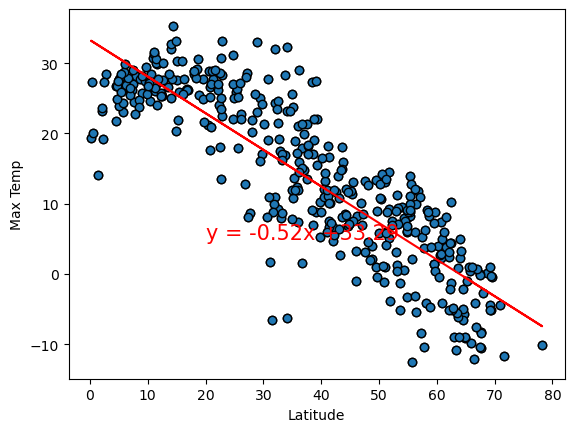

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black', c='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5761473879077507


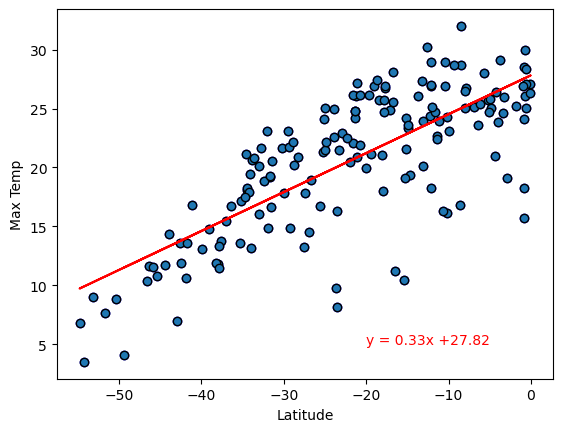

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.text(-20,5,line_eq, color='r')
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08164987988796207


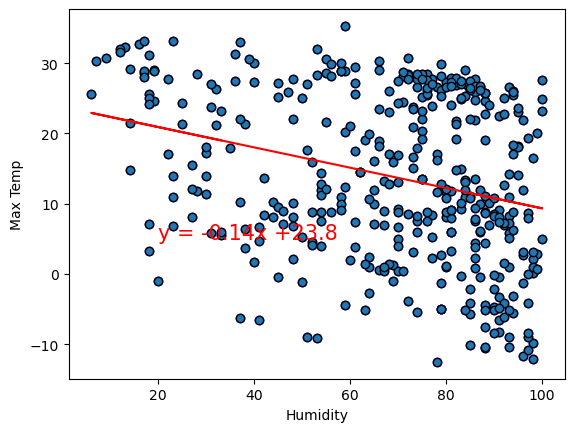

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Humidity')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0027498864904880087


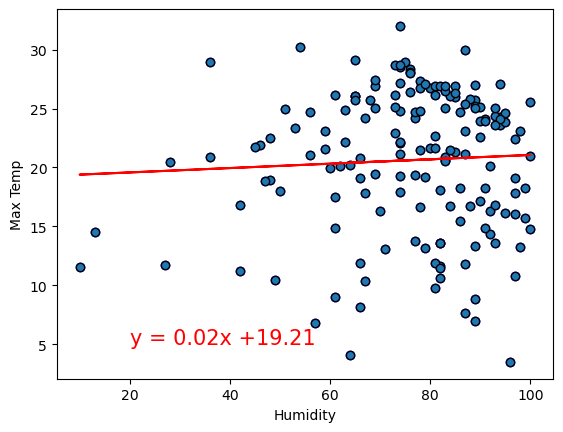

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Humidity')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator.
As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07353644647430264


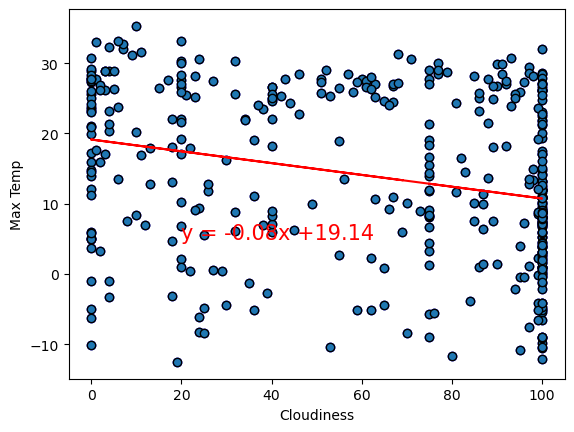

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Cloudiness')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00957498627111586


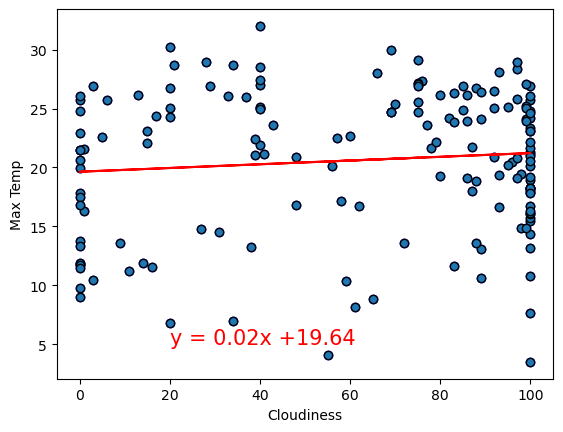

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Cloudiness')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0027370486383826945


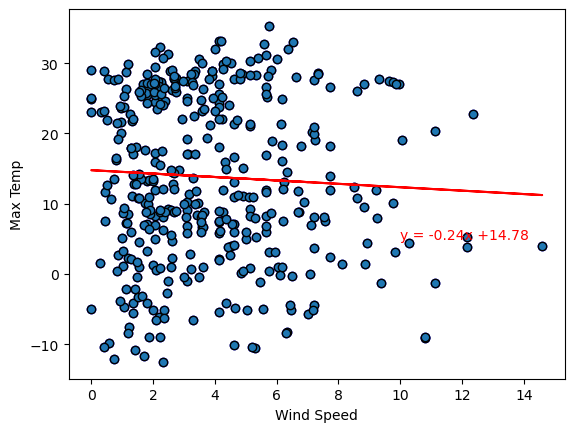

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Wind Speed')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.text(10,5,line_eq,color="r")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0015468300696274686


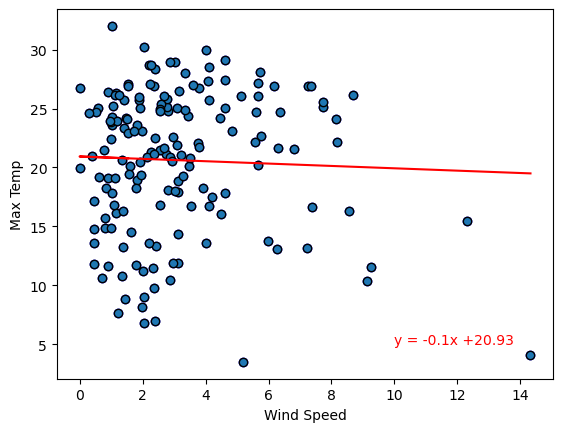

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, c ='b')
plt.xlabel('Wind Speed')
plt.ylabel('Max Temp')

from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.text(10,5,line_eq,color="r")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed.